In [ ]:
#ANN Model - Main

In [143]:
import traceback

try:
    import numpy as np
    import pandas as pd
    import sklearn
    import scipy as sp
    import math
    import matplotlib.pyplot as plt
    import seaborn as sns
    import datetime
    import csv
    import os
    import code
    import time
    import statsmodels.api as sm
    import pickle
    
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    
    import warnings
    warnings.filterwarnings('ignore')


except:
    
    print(traceback.print_exc())
    input("\nError BC.\n")



In [105]:
data0 = pd.read_csv(r"data0.csv", decimal = ",")
data0["date"] = data0["date"].astype('datetime64[ns]')

In [106]:
nor_data0 = data0.iloc[:,1:22]

norm_data0=(nor_data0-nor_data0.min())/(nor_data0.max()-nor_data0.min())

In [107]:
X_1 = X_0.sample(frac = 0.70)
y_1 = y_0[X_1.index]
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1)

In [62]:
regr = MLPRegressor(random_state=69, hidden_layer_sizes = (128,128,128,128), activation = 'relu', solver = 'adam',
                    learning_rate = 'adaptive', max_iter = 1000,
                    batch_size = 'auto', verbose = 'True')
regr.fit(X_train, y_train)



Iteration 1, loss = 0.46630689
Iteration 2, loss = 0.36452831
Iteration 3, loss = 0.31781520
Iteration 4, loss = 0.28793707
Iteration 5, loss = 0.26647434
Iteration 6, loss = 0.24974475
Iteration 7, loss = 0.23611522
Iteration 8, loss = 0.22522191
Iteration 9, loss = 0.21518487
Iteration 10, loss = 0.20756254
Iteration 11, loss = 0.20064387
Iteration 12, loss = 0.19348142
Iteration 13, loss = 0.18804755
Iteration 14, loss = 0.18247011
Iteration 15, loss = 0.17785762
Iteration 16, loss = 0.17375842
Iteration 17, loss = 0.16988770
Iteration 18, loss = 0.16642840
Iteration 19, loss = 0.16274631
Iteration 20, loss = 0.16004633
Iteration 21, loss = 0.15733007
Iteration 22, loss = 0.15441156
Iteration 23, loss = 0.15274089
Iteration 24, loss = 0.14971344
Iteration 25, loss = 0.14785448
Iteration 26, loss = 0.14642694
Iteration 27, loss = 0.14335171
Iteration 28, loss = 0.14183208
Iteration 29, loss = 0.14011170
Iteration 30, loss = 0.13818468
Iteration 31, loss = 0.13689929
Iteration 32, los

C:\Users\Shyam Bahmani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=(128, 128, 128, 128), learning_rate='adaptive',
             max_iter=1000, random_state=69, verbose='True')

In [108]:
y_pred=regr.predict(X_test)

In [109]:
mean_squared_error(y_test, y_pred) , r2_score(y_test, y_pred)

(0.2314995516941555, 0.817426935748228)

filename = 'regr_model_100x100(70-30).sav'
import pickle
pickle.dump(regr, open(filename, 'wb'))


Mean Squared Error: 0.2314995516941555
R2 Score: 0.817426935748228
Mean Absolute Error: 0.3312236672273799
Mean Squared Error: 0.2314995516941555
Root Mean Squared Error: 0.4811440030740854


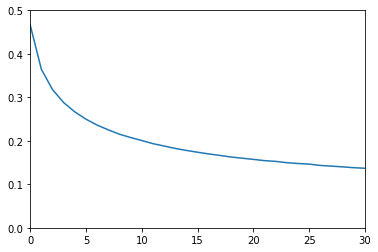

In [134]:


"""(random_state=69, hidden_layer_sizes = (128,128,128,128),
                    activation = 'relu', solver = 'adam',
                    learning_rate = 'adaptive', max_iter = 1000,
                    batch_size = 'auto', verbose = 'True')
"""

plt.plot(regr.loss_curve_)
plt.ylim([0,0.5])
plt.xlim([0,30])


print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Absolute Error:',
      sklearn.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',
      sklearn.metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))




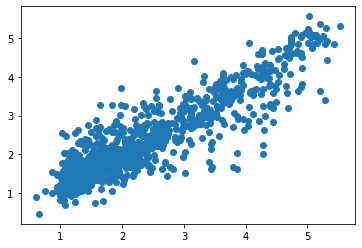

In [137]:
"""

From scatter plots of Actual vs Predicted You can tell how well
the model is performing. For Ideal model, the points should be
closer to a diagonal line.

"""

plt.scatter(y_test[0:1000],y_pred[0:1000])
plt.show()

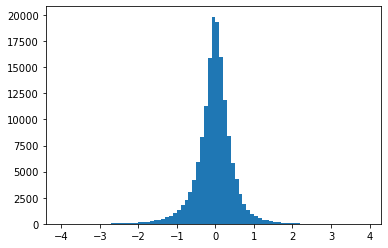

In [138]:
#Histogram of residual

"""

Residuals in a statistical or machine learning model are
the differences between observed and predicted values of data.

One of the assumption in Linear regression is that the residual
should be normally distributed, if your model’s residual is not
normally distributed it will not have a bell shaped curve which
indicates that your model is not bias and in this case for your
dateset regression may not be an appropriate choice.

"""

plt.hist((y_pred-y_test), bins = np.arange(-4,4,0.1))
plt.show()

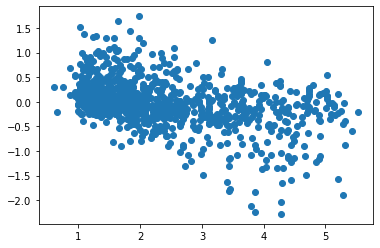

In [139]:
"""

In this scatter plot the y axis represents
residuals and the x axis represented fitted values
or predicted value. This plot is used to detect non-linearity,
unequal error variances, and outliers in the model.


Here we compare the first 1000 datapoints.

"""

plt.scatter(y_test[0:1000], (y_pred[0:1000]-y_test[0:1000]))
plt.show()

In [145]:
filename = 'D:\IME672A\ANN_128x4.sav'
pickle.dump(regr, open(filename, 'wb'))